#Create the environment

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In [35]:
import pandas as pd
import xarray as xr
import numpy as np

#Create the dataset

In [36]:
dataset = xr.open_dataset('Data/05_2019_weather_and_CO.nc')
dataset = dataset.sortby(['latitude','longitude','time'])  
dataframe = dataset.to_dataframe()
dataframe = dataframe.reset_index()
dataframe = dataframe.set_index('time')
dataframe.head()

,latitude,longitude,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
time,,,,,,,,,,,,,,,,,
2019-05-01 00:00:00,43.0,4.0,NaN,2.632092,-5.720040,0.0,0.043108,0.043108,0.0,2.980232e-08,101590.312500,264.142151,0.000004,0.000219,15.109747,15.114744,6.296568
2019-05-01 01:00:00,43.0,4.0,1.605808e-13,2.960762,-5.035299,0.0,0.045595,0.046689,0.0,2.980232e-08,101555.247396,263.693481,0.000004,0.000227,14.677999,14.682165,5.841263
2019-05-01 02:00:00,43.0,4.0,1.405082e-13,3.289431,-4.350558,0.0,0.048083,0.050270,0.0,2.980232e-08,101520.182292,263.244812,0.000004,0.000235,14.246251,14.249586,5.454147
2019-05-01 03:00:00,43.0,4.0,1.354900e-13,3.618101,-3.665817,0.0,0.050570,0.053851,0.0,2.980232e-08,101485.117188,262.796143,0.000004,0.000243,13.814503,13.817007,5.150618
2019-05-01 04:00:00,43.0,4.0,1.354900e-13,3.346790,-3.465523,0.0,0.035199,0.038485,0.0,2.980232e-08,101505.005208,262.032552,0.000004,0.000264,13.644949,13.647179,4.817765


In [37]:
dataframe['tmp_shift_8']=dataframe.groupby(['latitude','longitude']).tmp.shift(periods=8)
dataframe.head(10)

,latitude,longitude,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind,tmp_shift_8
time,,,,,,,,,,,,,,,,,,
2019-05-01 00:00:00,43.0,4.0,NaN,2.632092,-5.720040,0.000000,0.043108,0.043108,0.0,2.980232e-08,101590.312500,264.142151,0.000004,0.000219,15.109747,15.114744,6.296568,NaN
2019-05-01 01:00:00,43.0,4.0,1.605808e-13,2.960762,-5.035299,0.000000,0.045595,0.046689,0.0,2.980232e-08,101555.247396,263.693481,0.000004,0.000227,14.677999,14.682165,5.841263,NaN
2019-05-01 02:00:00,43.0,4.0,1.405082e-13,3.289431,-4.350558,0.000000,0.048083,0.050270,0.0,2.980232e-08,101520.182292,263.244812,0.000004,0.000235,14.246251,14.249586,5.454147,NaN
2019-05-01 03:00:00,43.0,4.0,1.354900e-13,3.618101,-3.665817,0.000000,0.050570,0.053851,0.0,2.980232e-08,101485.117188,262.796143,0.000004,0.000243,13.814503,13.817007,5.150618,NaN
2019-05-01 04:00:00,43.0,4.0,1.354900e-13,3.346790,-3.465523,0.000000,0.035199,0.038485,0.0,2.980232e-08,101505.005208,262.032552,0.000004,0.000264,13.644949,13.647179,4.817765,NaN
2019-05-01 05:00:00,43.0,4.0,1.455263e-13,3.075480,-3.265230,0.000000,0.019827,0.023118,0.0,2.980232e-08,101524.893229,261.268962,0.000004,0.000284,13.475395,13.477350,4.485566,NaN
2019-05-01 06:00:00,43.0,4.0,2.107622e-13,2.804169,-3.064936,0.000000,0.004456,0.007752,0.0,2.980232e-08,101544.781250,260.505371,0.000004,0.000304,13.305841,13.307522,4.154178,NaN
2019-05-01 07:00:00,43.0,4.0,5.469782e-13,2.382055,-2.672021,0.045179,0.004069,0.052534,0.0,2.980232e-08,101579.453125,260.972127,0.000004,0.000294,13.219077,13.221288,3.579648,NaN
2019-05-01 08:00:00,43.0,4.0,8.129401e-13,1.959942,-2.279106,0.090357,0.003683,0.097316,0.0,2.980232e-08,101614.125000,261.438883,0.000004,0.000283,13.132313,13.135054,3.005943,264.142151


In [38]:
dataframe['tot_wind_shift_12']=dataframe.groupby(['latitude','longitude']).tot_wind.shift(periods=12)
dataframe.head(15)

,latitude,longitude,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind,tmp_shift_8,tot_wind_shift_12
time,,,,,,,,,,,,,,,,,,,
2019-05-01 00:00:00,43.0,4.0,NaN,2.632092,-5.720040,0.000000,4.310820e-02,0.043108,0.0,2.980232e-08,101590.312500,264.142151,0.000004,0.000219,15.109747,15.114744,6.296568,NaN,NaN
2019-05-01 01:00:00,43.0,4.0,1.605808e-13,2.960762,-5.035299,0.000000,4.559550e-02,0.046689,0.0,2.980232e-08,101555.247396,263.693481,0.000004,0.000227,14.677999,14.682165,5.841263,NaN,NaN
2019-05-01 02:00:00,43.0,4.0,1.405082e-13,3.289431,-4.350558,0.000000,4.808280e-02,0.050270,0.0,2.980232e-08,101520.182292,263.244812,0.000004,0.000235,14.246251,14.249586,5.454147,NaN,NaN
2019-05-01 03:00:00,43.0,4.0,1.354900e-13,3.618101,-3.665817,0.000000,5.057010e-02,0.053851,0.0,2.980232e-08,101485.117188,262.796143,0.000004,0.000243,13.814503,13.817007,5.150618,NaN,NaN
2019-05-01 04:00:00,43.0,4.0,1.354900e-13,3.346790,-3.465523,0.000000,3.519865e-02,0.038485,0.0,2.980232e-08,101505.005208,262.032552,0.000004,0.000264,13.644949,13.647179,4.817765,NaN,NaN
2019-05-01 05:00:00,43.0,4.0,1.455263e-13,3.075480,-3.265230,0.000000,1.982720e-02,0.023118,0.0,2.980232e-08,101524.893229,261.268962,0.000004,0.000284,13.475395,13.477350,4.485566,NaN,NaN
2019-05-01 06:00:00,43.0,4.0,2.107622e-13,2.804169,-3.064936,0.000000,4.455745e-03,0.007752,0.0,2.980232e-08,101544.781250,260.505371,0.000004,0.000304,13.305841,13.307522,4.154178,NaN,NaN
2019-05-01 07:00:00,43.0,4.0,5.469782e-13,2.382055,-2.672021,0.045179,4.069179e-03,0.052534,0.0,2.980232e-08,101579.453125,260.972127,0.000004,0.000294,13.219077,13.221288,3.579648,NaN,NaN
2019-05-01 08:00:00,43.0,4.0,8.129401e-13,1.959942,-2.279106,0.090357,3.682613e-03,0.097316,0.0,2.980232e-08,101614.125000,261.438883,0.000004,0.000283,13.132313,13.135054,3.005943,264.142151,NaN


In [39]:
dataframe['rel_hum_shift_8']=dataframe.groupby(['latitude','longitude']).rel_hum.shift(periods=8)
dataframe.head(10)

,latitude,longitude,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind,tmp_shift_8,tot_wind_shift_12,rel_hum_shift_8
time,,,,,,,,,,,,,,,,,,,,
2019-05-01 00:00:00,43.0,4.0,NaN,2.632092,-5.720040,0.000000,0.043108,0.043108,0.0,2.980232e-08,101590.312500,264.142151,0.000004,0.000219,15.109747,15.114744,6.296568,NaN,NaN,NaN
2019-05-01 01:00:00,43.0,4.0,1.605808e-13,2.960762,-5.035299,0.000000,0.045595,0.046689,0.0,2.980232e-08,101555.247396,263.693481,0.000004,0.000227,14.677999,14.682165,5.841263,NaN,NaN,NaN
2019-05-01 02:00:00,43.0,4.0,1.405082e-13,3.289431,-4.350558,0.000000,0.048083,0.050270,0.0,2.980232e-08,101520.182292,263.244812,0.000004,0.000235,14.246251,14.249586,5.454147,NaN,NaN,NaN
2019-05-01 03:00:00,43.0,4.0,1.354900e-13,3.618101,-3.665817,0.000000,0.050570,0.053851,0.0,2.980232e-08,101485.117188,262.796143,0.000004,0.000243,13.814503,13.817007,5.150618,NaN,NaN,NaN
2019-05-01 04:00:00,43.0,4.0,1.354900e-13,3.346790,-3.465523,0.000000,0.035199,0.038485,0.0,2.980232e-08,101505.005208,262.032552,0.000004,0.000264,13.644949,13.647179,4.817765,NaN,NaN,NaN
2019-05-01 05:00:00,43.0,4.0,1.455263e-13,3.075480,-3.265230,0.000000,0.019827,0.023118,0.0,2.980232e-08,101524.893229,261.268962,0.000004,0.000284,13.475395,13.477350,4.485566,NaN,NaN,NaN
2019-05-01 06:00:00,43.0,4.0,2.107622e-13,2.804169,-3.064936,0.000000,0.004456,0.007752,0.0,2.980232e-08,101544.781250,260.505371,0.000004,0.000304,13.305841,13.307522,4.154178,NaN,NaN,NaN
2019-05-01 07:00:00,43.0,4.0,5.469782e-13,2.382055,-2.672021,0.045179,0.004069,0.052534,0.0,2.980232e-08,101579.453125,260.972127,0.000004,0.000294,13.219077,13.221288,3.579648,NaN,NaN,NaN
2019-05-01 08:00:00,43.0,4.0,8.129401e-13,1.959942,-2.279106,0.090357,0.003683,0.097316,0.0,2.980232e-08,101614.125000,261.438883,0.000004,0.000283,13.132313,13.135054,3.005943,264.142151,NaN,0.000219


In [40]:
dataframe = dataframe.reset_index()
dataframe = dataframe.set_index(['latitude','longitude','time'])
dataframe.head()

EMISSIONS_2019  ...  rel_hum_shift_8
latitude longitude time                                 ...                 
43.0     4.0       2019-05-01 00:00:00             NaN  ...              NaN
                   2019-05-01 01:00:00    1.605808e-13  ...              NaN
                   2019-05-01 02:00:00    1.405082e-13  ...              NaN
                   2019-05-01 03:00:00    1.354900e-13  ...              NaN
                   2019-05-01 04:00:00    1.354900e-13  ...              NaN

[5 rows x 18 columns]

In [41]:
ds_final=dataframe.to_xarray()
ds_final

<xarray.Dataset>
Dimensions:            (latitude: 33, longitude: 33, time: 742)
Coordinates:
  * latitude           (latitude) float64 43.0 43.25 43.5 ... 50.5 50.75 51.0
  * longitude          (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * time               (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables: (12/18)
    EMISSIONS_2019     (latitude, longitude, time) float64 nan 1.606e-13 ... nan
    u10                (latitude, longitude, time) float64 2.632 2.961 ... 1.161
    v10                (latitude, longitude, time) float64 -5.72 ... 0.8654
    hcc                (latitude, longitude, time) float64 0.0 0.0 ... 0.9778
    lcc                (latitude, longitude, time) float64 0.04311 ... 0.1257
    tcc                (latitude, longitude, time) float64 0.04311 ... 0.9966
    ...                 ...
    tcwv               (latitude, longitude, time) float64 15.11 14.68 ... 25.31
    tcw                (latitude, longitude, time) float64 15.11 14.68 ... 25.4
    tot_wind           (latitude, longitude, time) float64 6.297 5.841 ... 1.448
    tmp_shift_8        (latitude, longitude, time) float64 nan nan ... 269.8
    tot_wind_shift_12  (latitude, longitude, time) float64 nan nan ... 2.726
    rel_hum_shift_8    (latitude, longitude, time) float64 nan nan ... 0.00014

#Check

In [42]:
dataframe.isnull().sum()

EMISSIONS_2019       23958
u10                      0
v10                      0
hcc                      0
lcc                      0
tcc                      0
cvl                      0
cvh                      0
sp                       0
tmp                      0
sp_hum                   0
rel_hum                  0
tcwv                     0
tcw                      0
tot_wind                 0
tmp_shift_8           8712
tot_wind_shift_12    13068
rel_hum_shift_8       8712
dtype: int64

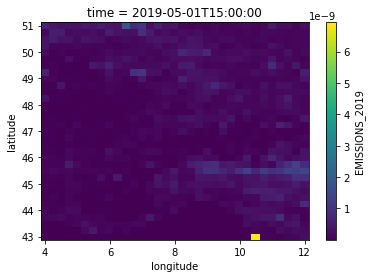

In [43]:
ds_final.isel(time=[15]).EMISSIONS_2019.plot()

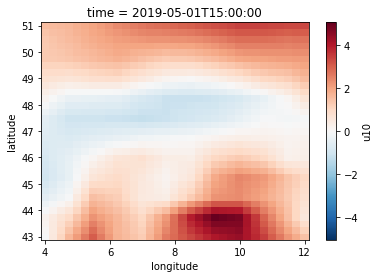

In [44]:
ds_final.isel(time=[15]).u10.plot()

#Save the dataset

In [45]:
ds_final.to_netcdf('Data/05_2019_weather_and_CO_for_model.nc', 'w', 'NETCDF4')